# <font color='blue'> Análisis básico de series de tiempo </font>

El objetivo de este notebook es ejemplificar algunos conceptos de análisis de series de tiempo, como:
- Principal Component Analysis
- Multidimensional Scaling
- K-means
- Singular Spectrum Analysis

## <font color='crimson'> Importar los datos </font>

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
import numpy as np
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.spatial import distance

**Datos disponibles en csv**:

In [2]:
dataLocation='./data'
!ls {dataLocation} | grep .csv

rendimientos.csv
returns^MXX_from2008-09-15_to2022-05-17_downloaded20230517.csv
returns^MXX_from2008-09-15_to2022-06-16_downloaded20220616.csv
returns_SP500.csv
stockPrices_downloaded20230517.csv


In [3]:
dataName='returns_SP500.csv'

data=pd.read_csv(
    f'{dataLocation}/{dataName}',
    index_col=0,
    parse_dates=True
)

data

,AAP_CD,AMZN_CD,AZO_CD,BBY_CD,BKNG_CD,CCL_CD,CMCSA_CD,DHI_CD,DISH_CD,DLTR_CD,...,LNT_UT,NEE_UT,NI_UT,NRG_UT,PEG_UT,PNW_UT,SO_UT,SRE_UT,WEC_UT,XEL_UT
2006-01-03,43.520000,2.379000,92.760002,44.730000,22.680000,54.570000,8.743333,36.939999,28.120001,8.066667,...,14.250000,10.515000,8.381139,23.975000,33.310001,42.450001,35.070000,46.139999,19.950001,18.570000
2006-01-04,43.830002,2.362500,91.900002,44.049999,22.760000,54.360001,8.793333,36.639999,28.620001,8.130000,...,14.440000,10.515000,8.337917,23.750000,33.365002,42.570000,34.990002,45.540001,20.014999,18.660000
2006-01-05,44.040001,2.382500,91.980003,43.500000,23.010000,53.790001,8.806667,37.369999,28.500000,8.110000,...,14.340000,10.542500,8.200393,23.174999,33.180000,42.360001,34.900002,46.820000,19.934999,18.650000
2006-01-06,43.990002,2.393500,91.010002,47.049999,23.139999,53.980000,9.093333,37.250000,28.959999,8.080000,...,14.475000,10.555000,8.294695,23.065001,33.805000,42.820000,35.099998,46.990002,20.084999,18.719999
2006-01-09,44.560001,2.354000,92.459999,47.799999,23.129999,54.560001,9.150000,39.950001,28.809999,8.320000,...,14.380000,10.510000,8.239686,23.400000,33.724998,42.369999,34.919998,46.549999,20.174999,18.670000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-19,168.179993,124.660004,2097.590088,73.970001,1902.989990,10.780000,34.459999,73.089996,17.030001,142.910004,...,61.889999,86.839996,29.290001,44.020000,66.620003,74.690002,78.269997,172.929993,102.279999,74.529999
2022-09-20,165.869995,122.190002,2131.469971,70.919998,1896.630005,10.420000,33.840000,71.930000,16.160000,142.619995,...,61.130001,85.690002,28.860001,42.799999,65.379997,73.309998,77.220001,168.860001,100.959999,73.480003
2022-09-21,165.500000,118.540001,2104.020020,69.980003,1806.699951,9.710000,32.700001,71.339996,16.010000,141.869995,...,60.290001,83.970001,28.410000,42.169998,64.480003,72.760002,76.129997,166.259995,99.930000,72.500000
2022-09-22,164.110001,117.309998,2082.639893,68.570000,1720.579956,9.640000,32.470001,70.949997,15.670000,139.330002,...,60.009998,83.540001,28.620001,41.380001,63.970001,72.699997,75.940002,164.190002,100.150002,72.449997


Calcularmos los rendimientos (logarítmicos):

In [4]:
dataLogRets=np.log(data).diff(axis=0).iloc[1:]
dataLogRets

,AAP_CD,AMZN_CD,AZO_CD,BBY_CD,BKNG_CD,CCL_CD,CMCSA_CD,DHI_CD,DISH_CD,DLTR_CD,...,LNT_UT,NEE_UT,NI_UT,NRG_UT,PEG_UT,PNW_UT,SO_UT,SRE_UT,WEC_UT,XEL_UT
2006-01-04,0.007098,-0.006960,-0.009314,-0.015319,0.003521,-0.003856,0.005702,-0.008154,0.017625,0.007821,...,0.013245,0.000000,-0.005170,-0.009429,0.001650,0.002823,-0.002284,-0.013089,0.003253,0.004835
2006-01-05,0.004780,0.008430,0.000870,-0.012564,0.010924,-0.010541,0.001515,0.019728,-0.004202,-0.002463,...,-0.006949,0.002612,-0.016631,-0.024508,-0.005560,-0.004945,-0.002575,0.027719,-0.004005,-0.000536
2006-01-06,-0.001136,0.004606,-0.010602,0.078450,0.005634,0.003526,0.032032,-0.003216,0.016011,-0.003706,...,0.009370,0.001185,0.011434,-0.004758,0.018661,0.010801,0.005714,0.003624,0.007496,0.003746
2006-01-09,0.012874,-0.016641,0.015807,0.015815,-0.000432,0.010687,0.006212,0.069977,-0.005193,0.029270,...,-0.006585,-0.004273,-0.006654,0.014420,-0.002369,-0.010565,-0.005141,-0.009408,0.004471,-0.002674
2006-01-10,0.001121,-0.030845,0.000000,0.009577,-0.006941,-0.015330,-0.001458,0.009715,-0.024953,-0.008045,...,0.006930,-0.001190,-0.002865,-0.008153,-0.004756,-0.000472,-0.001433,0.001717,-0.001240,0.004809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-19,0.008239,0.009106,-0.031931,0.018282,0.014045,0.001857,-0.001740,0.027323,-0.015152,0.006952,...,0.016782,0.023890,0.015830,0.003413,0.003910,0.014294,0.013117,0.026307,0.009726,0.008489
2022-09-20,-0.013830,-0.020013,0.016023,-0.042107,-0.003348,-0.033965,-0.018156,-0.015998,-0.052437,-0.002031,...,-0.012356,-0.013331,-0.014790,-0.028106,-0.018789,-0.018649,-0.013506,-0.023817,-0.012990,-0.014188
2022-09-21,-0.002233,-0.030327,-0.012962,-0.013343,-0.048577,-0.070571,-0.034268,-0.008236,-0.009326,-0.005273,...,-0.013836,-0.020277,-0.015715,-0.014829,-0.013861,-0.007531,-0.014216,-0.015517,-0.010254,-0.013427
2022-09-22,-0.008434,-0.010430,-0.010214,-0.020354,-0.048841,-0.007235,-0.007058,-0.005482,-0.021465,-0.018066,...,-0.004655,-0.005134,0.007365,-0.018911,-0.007941,-0.000825,-0.002499,-0.012528,0.002199,-0.000690


Acomodar los datos:

In [6]:
sectores=list(set([sec.split('_')[-1] for sec in dataLogRets.columns]))
bloques=dict()
for i,s in enumerate(sectores):
    bloques[s]=[(j,comp) for j,comp in enumerate(dataLogRets.columns) if '_'+s in comp]

In [7]:
etiquetas=sorted([(a,b[0][0],b[-1][0]) for a, b in bloques.items()],key=lambda x: x[1])
etiquetas

[('CD', 0, 48),
 ('CS', 49, 77),
 ('EG', 78, 94),
 ('FN', 95, 145),
 ('HC', 146, 188),
 ('ID', 189, 231),
 ('IT', 232, 283),
 ('MT', 284, 299),
 ('TC', 300, 301),
 ('UT', 302, 325)]

Clase auxiliar para graficación:

In [5]:
class MidpointNormalize(matplotlib.colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        matplotlib.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

Grafiquita de la correlación global:

In [9]:
corrGlob=dataLogRets.corr()

NameError: name 'kmeans' is not defined

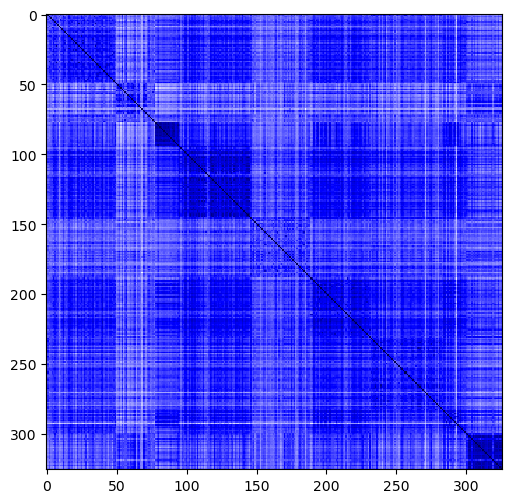

In [10]:
%matplotlib inline

#Parámetros de graficación
coloresCorr='seismic_r' #plt.cm.BuPu_r,'cool', 'bwr_r'
norm=MidpointNormalize(
    midpoint=0.,vmin=-1,vmax=1
)
cBarShrink=0.6
fig, ax = plt.subplots(
    nrows=1, 
    ncols=1,
    figsize=(5,5),
    constrained_layout=True
)

ax.imshow(
    corrGlob,
    cmap=coloresCorr,
    norm=norm,
    origin='upper',
    interpolation='nearest',
    aspect='equal'
)

ax.set_title(
    (f'Correlación global {i+1}\n'
    f'($\overline{{c}}={corrGlob.loc[np.triu_indices(data.shape[1])].mean():.2f}$, '
    f'$\sigma_{{c}}={corrGlob.loc[np.triu_indices(data.shape[1])],mean():.2f}$)'),
    fontsize=18
)

fig.colorbar(
    cax[-1],
    ax=axes[i],
    orientation='vertical',
    shrink=cBarShrink,
    aspect=50
)

ax.set_xticks(
    [e[1] for e in etiquetas]
)
ax.set_xticklabels(
    #[e[0] if e[0]!='UT' else 4*' '+e[0] for e in etiquetas],
   [e[0] if e[0] not in {'FN','TC','UT'} else ' '*3+e[0] if e[0]!='UT' else ' '*12+e[0] for e in etiquetas],
    fontsize=14,
    va='top',
    ha='center'
)

ax.set_yticks(
    [e[1] for e in etiquetas]
)
ax.set_yticklabels(
    [e[0] if e[0]!='UT' else '\n'*2+e[0] for e in etiquetas],
    fontsize=14,
    va='center',
    ha='right'
)

ax.grid(
    which='major',
    color='black',
    linestyle='-.',
    linewidth=0.5
)

plt.show()